# Kaggle : Titanic competition

## Introduction

This is the work I did for the famous Kaggle competition **Titanic**.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The notebook explains my work, the choices I did and the results I got.

## Data

In [51]:
# use of pandas for data processing
import pandas as pd
# file names
training_file = "./data/train.csv"
test_file = "./data/test.csv"
gender_submission_file = "./data/gender_submission.csv"

In [52]:
# creation of a dataframe for each file
training_data = pd.read_csv(training_file)
test_data = pd.read_csv(test_file)
gender_submission = pd.read_csv(gender_submission_file)

In [53]:
print("Training data overview : \n\n",training_data[:10])

Training data overview : 

    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarth

In [54]:
print("Test data overview : \n\n",test_data[:10])

Test data overview : 

    PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7

In [55]:
print("Gender submission overview : ",gender_submission[:10])

Gender submission overview :     PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0


### What is inside training data ?

In [56]:
import math

print("Training dataset size : ",training_data.shape)

# list of booleans with true value if a passenger survived and false othherwise
list_survivors = (training_data[:]["Survived"]==1)

# proportion of survival in training dataset
training_survivor_proportion = 0
# list of survived passenger id 
index_survivors = []
for i in range(training_data.shape[0]):
    if list_survivors[i]:
        training_survivor_proportion += 1
        index_survivors.append(i)
training_survivor_proportion /= training_data.shape[0]

print("Survival rate : ",math.floor(10000*training_survivor_proportion)/100, "%")
print("Dissapearence rate : ",math.floor(10000*(1-training_survivor_proportion))/100,"%\n\n")



print("Test dataset shape : ",gender_submission.shape)
# proportion of survival in training dataset
test_survivor_proportion = 0
for survived in gender_submission["Survived"]:
    if survived==1:
        test_survivor_proportion += 1
test_survivor_proportion /= gender_submission.shape[0]

print("Survival rate : ",math.floor(10000*test_survivor_proportion)/100,"%")
print("Dissapearence rate : ",math.floor(10000*(1-test_survivor_proportion))/100,"%")



Training dataset size :  (891, 12)
Survival rate :  38.38 %
Dissapearence rate :  61.61 %


Test dataset shape :  (418, 2)
Survival rate :  36.36%
Dissapearence rate :  63.63 %


The training dataset consists in 891 passengers, 61% of whom died and 39% survived.
The dataset is **not perfectly balanced**, that is something we should take into account in the next part.

### Rebalancing training data something

The goal here is to achieve 50% of survival and 50% of dissapearence.

In [57]:
# add the required number of survivor in the training dataset in order to reach equality beetwen survival and dissapearence rates. 
training_data = training_data.copy().append(training_data.iloc[index_survivors[0:int(training_data.shape[0]*(1-2*training_survivor_proportion))+1]],ignore_index=True)

print("New training dataset size : ",training_data.shape)

# Computation of survival and dissapearence rates
list_survivors = (training_data[:]["Survived"]==1)
training_survivor_proportion = 0
for i in range(training_data.shape[0]):
    if list_survivors.iloc[i]:
        training_survivor_proportion += 1
training_survivor_proportion /= training_data.shape[0]

print("Survival rate : ",100*training_survivor_proportion)
print("Dissapearence rate : ",100*(1-training_survivor_proportion))



New training dataset size :  (1099, 12)
Survival rate :  50.04549590536852
Dissapearence rate :  49.95450409463148


### Strategy

The goal here is to learn from the training dataset, if a given passenger would survived the titanic shipwreck.

To do so, we have a few informations per passenger : 
- the passenger id (PassengerId)
- whether he survived or not (Survived)
- the ticket class (Pclass)
- his name (Name)
- his sex (Sex)
- his age (Age)
- the number of siblings/spouses aboard the Titanic (SibSp)
- the number of parents/children abroad the Titanic (Parch)
- the ticket number (Ticket)
- the passenger fare (Fare)
- the cabin number (Cabin)
- the port of embarkation (Embarked)

Those information include a number of interesting features (inputs) to predict the output : whether a passenger survive or not.

This is a **classification problem**, given a passenger, we would like to predict 1 if he survived and 0 otherwise. 

Different machine learning can be used in order predict that. 
For this particular one, I will try both **Sequential Neural Network** and **Logistic Regression** and compare the results.

## 1st approach : Sequential Neural Network

### Strucure of the Neural Network

- **the input layor** consists of the features given in the training dataset and explained above
- **two headen layers**
- **the output layer** consists in one neuron, activated by a **sigmoid** function. With a threshold of 0.5, this neuron gives the prediction of the dead of a given passenger.

The NN is trained with keras (tensorflow) and tested on the test dataset.


### The input layer

The input layer is composed of 5 features, the relevant passenger information, i-e the class, the sex, the age, the family information. The other features (id, name, the ticket and cabin numbers, the fare, the embarkation location) seems not so relevant to decide whether a passenger is more lucky to survive than an other one. 

The input layer is a 5-element normalised vector.  

In [58]:
import numpy as np

# training data processing

# used features
features = ["Pclass","Sex","Age","SibSp","Parch"]
# initilisation of input and output for training time
input_training_data = np.zeros((training_data.shape[0],len(features)))
output_training_data = np.zeros((training_data.shape[0],1))
# features max values used for data processing 
max_age = training_data["Age"].max()
max_sibsp = training_data["SibSp"].max()
max_parch = training_data["Parch"].max()
# data processing 
# every feature value is moved beetwen 0 and 1
for i in range(training_data.shape[0]):
    # 3 different classes 0 for the 1st class, 0.5 for second and 1 for the third one
    input_training_data[i][0] = ((training_data["Pclass"][i]-1)/2)
    # 0 for male and 1 for female
    input_training_data[i][1] = ["male","female"].index(training_data["Sex"][i])
    # features divided by max value
    input_training_data[i][2] = training_data["Age"][i] / max_age 
    input_training_data[i][3] = training_data["SibSp"][i] / max_sibsp
    input_training_data[i][4] = training_data["Parch"][i] / max_parch
    # modification of nan value to 0
    if  len(np.where(np.isnan(input_training_data[i]))) > 0:
        for index in np.where(np.isnan(input_training_data[i])):
            input_training_data[i][index] = 0
    # output data set
    output_training_data[i] = training_data["Survived"][i]
    
    # Normalisation of inputs
    input_training_data[i] -= np.mean(input_training_data[i])
    if np.std(input_training_data[i]) != 0:
        input_training_data[i] /= np.std(input_training_data[i])



print("Size of both sets : \n",input_training_data.shape, output_training_data.shape)

print("Input at training time : \n",input_training_data[:10])
print("Output at training time : \n",output_training_data[:10])

Size of both sets : 
 (1099, 5) (1099, 1)
Input at training time : 
 [[ 1.92531264 -0.74873269 -0.01337023 -0.41447703 -0.74873269]
 [-0.83790882  1.78055624  0.40586208 -0.51060069 -0.83790882]
 [ 1.18190563  1.18190563 -0.30928372 -1.02726378 -1.02726378]
 [-0.82422559  1.8132963   0.32969024 -0.49453536 -0.82422559]
 [ 1.80611411 -0.72878289  0.38023455 -0.72878289 -0.72878289]
 [ 2.         -0.5        -0.5        -0.5        -0.5       ]
 [-0.5        -0.5         2.         -0.5        -0.5       ]
 [ 1.86453973 -0.85080939 -0.78292566  0.16744653 -0.39825121]
 [ 1.1657882   1.1657882  -0.49217534 -1.33679827 -0.50260278]
 [ 0.38881389  1.77743494 -0.51378979 -0.65265189 -0.99980715]]
Output at training time : 
 [[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]]


In [59]:
# test data processing

input_test_data = np.zeros((test_data.shape[0],len(features)))
output_test_data = np.zeros((test_data.shape[0],1))


max_age = test_data["Age"].max()
max_sibsp = test_data["SibSp"].max()
max_parch = test_data["Parch"].max()


for i in range(test_data.shape[0]):
    input_test_data[i][0] = (test_data["Pclass"][i]-1)/2 
    input_test_data[i][1] = ["male","female"].index(test_data["Sex"][i])
    input_test_data[i][2] = test_data["Age"][i] / max_age 
    input_test_data[i][3] = test_data["SibSp"][i] / max_sibsp
    input_test_data[i][4] = test_data["Parch"][i] / max_parch


    if  len(np.where(np.isnan(input_test_data[i]))) > 0:
        for index in np.where(np.isnan(input_test_data[i])):
            input_test_data[i][index] = 0


    output_test_data[i] = gender_submission["Survived"][i]

    # Normalisation of inputs
    input_test_data[i] -= np.mean(input_test_data[i])
    if np.std(input_test_data[i]) != 0:
        input_test_data[i] /= np.std(input_test_data[i])



print("Size of both sets : \n",input_test_data.shape, output_test_data.shape)

print("Input at test time : \n",input_test_data[:10])
print("Output at test time : \n",output_test_data[:10])

Size of both sets : 
 (418, 5) (418, 1)
Input at test time : 
 [[ 1.79185503 -0.73469381  0.41222639 -0.73469381 -0.73469381]
 [ 1.06804359  1.06804359  0.16503297 -1.00265317 -1.29846699]
 [ 0.70192644 -0.77991827  1.63782836 -0.77991827 -0.77991827]
 [ 1.87110915 -0.69575539  0.21615701 -0.69575539 -0.69575539]
 [ 1.21023986  1.21023986 -0.5273571  -0.92957862 -0.963544  ]
 [ 1.96593227 -0.61011691 -0.13558154 -0.61011691 -0.61011691]
 [ 1.15997926  1.15997926 -0.1874714  -1.06624357 -1.06624357]
 [ 1.57734391 -1.19618626  0.70149228 -0.50280371 -0.57984622]
 [ 1.20285094  1.20285094 -0.45822893 -0.97373648 -0.97373648]
 [ 1.89375079 -0.83210262 -0.07890628 -0.15063927 -0.83210262]]
Output at test time : 
 [[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]]


### Neural network training

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# definition of our keras model (using sequential neural network)
model = Sequential()
# add a hidden layer with 256 nodes with activation relu
model.add(Dense(256, input_dim=len(features), activation='relu'))
# add a little dropout 
model.add(Dropout(0.95))
# add an other hidden layer with 128 nodes with activation relu
model.add(Dense(128, activation='relu'))
# add a little dropout
model.add(Dropout(0.95))
# add the output layer with activation sigmoid
model.add(Dense(1, activation='sigmoid'))



In [61]:
# compiling the model with binary_crossentropy loss, adam optimizer and accuracy metrics 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# displaying the model
print(model.summary())
# training the model with training data, 10 epochs and batch of size 32
print(model.fit(input_training_data, output_training_data,epochs=10,batch_size=32,verbose=1,shuffle=True))
# evaluation of model accuracy
_ , acc = model.evaluate(input_test_data, output_test_data, batch_size=32)
print('test accuracy: ', acc)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               1536      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1099/1099 [==============================] - 2s 2ms/step - loss: 1.4026 - acc: 0.4841
Epoch 2/10
1099/1099 [==============

The neural netork has been trained with an **accuracy** of **98%**.
Let's build some indicator, **confusion matrix and AUC-ROC** to check this value.

In [62]:
def predict(vec_sentence):
    """
    This function takes a sentence's vector and returns the output of the neural network (rounded to 0 or 1).
    """
    return np.round(model.predict(vec_sentence))

In [63]:
from sklearn.metrics import confusion_matrix
# results of the predictions with trained neural network
pred = [round(elt[0]) for elt in predict(input_test_data)]
# display part of the outcomes
print("Real outcomes : \n",output_test_data[0:10].tolist())
print("Predicted outcomes : \n",pred[0:10])
print("Confusion matrix : \n",confusion_matrix(output_test_data, pred))


Real outcomes : 
 [[0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0]]
Predicted outcomes : 
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]
Confusion matrix : 
 [[265   1]
 [  5 147]]


AUC-ROC score :  0.981672932330827


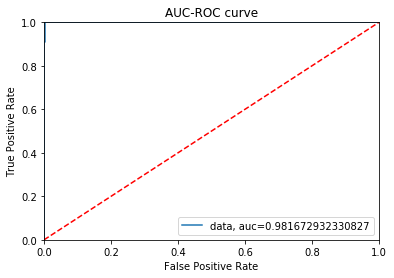

In [64]:
from sklearn.metrics import roc_auc_score

# computation of the AUC-ROC score
auc = roc_auc_score(output_test_data, pred)
print("AUC-ROC score : ",auc)

import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# calculate the false positive rate fpr and true positive tpr for all thresholds of the classification
probs = model.predict(input_test_data)
fpr, tpr, threshold = metrics.roc_curve(output_test_data, probs)

plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.title('AUC-ROC curve')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




## Conclusion du RNN

The results I got are very satisfaying. The accuracy is very high and the network is able to learn from data and predict wheter a Titanic passenger will die or not.

## Logistic Regression


C:\Users\Julienv\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Logistic regression training accuracy : 
 0.7679708826205641
Predicted outcomes : 
 [0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
True outcomes : 
 [[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]]
Accuracy on test set : 
 0.9712918660287081
Logistic confusion matrix : 
 [[254  12]
 [  0 152]]


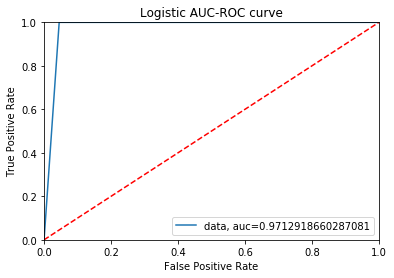

In [65]:
from sklearn.linear_model import LogisticRegression


# Training of our logistic regression
clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=150000, multi_class='ovr').fit(input_training_data, output_training_data)
print("Logistic regression training accuracy : \n",clf.score(input_training_data, output_training_data))

# test of the regression
logistic_prediction = clf.predict(input_test_data)
print("Predicted outcomes : \n",logistic_prediction[:10])
print("True outcomes : \n",output_test_data[:10])

# calculation of the accuracy on test set
nb_right = 0
for i in range(len(logistic_prediction)):
    if logistic_prediction[i] == output_test_data[i]:
        nb_right += 1

print("Accuracy on test set : \n",nb_right/len(logistic_prediction))

logistic_confusion_matrix = confusion_matrix(output_test_data,logistic_prediction)
print("Logistic confusion matrix : \n",logistic_confusion_matrix)


fpr, tpr, threshold = metrics.roc_curve(output_test_data, logistic_prediction)

plt.plot(fpr,tpr,label="data, auc="+str(nb_right/len(logistic_prediction)))
plt.title('Logistic AUC-ROC curve')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Conclusion 

Both methods, sequential neural network and logistic regression, gave impressivly high accuracy : 
- 98 % of accuracy for sequential neural network
- 97% of accuracu for logistic regression.

The objective of the competition seems to be fullfil.